<a href="https://colab.research.google.com/github/ktfrahm/datascience-projects/blob/main/Shinkansen_Travel_Experience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**

This problem statement is based on the Shinkansen Bullet Train in Japan, and passengers’ experience with that mode of travel. This machine-learning exercise aims to determine the relative importance of each parameter with regard to their contribution to the passengers’ overall travel experience. The dataset contains a random sample of individuals who traveled on this train. The on-time performance of the trains along with passenger information is published in a file named ‘Traveldata_train.csv’.  These passengers were later asked to provide their feedback on various parameters related to the travel along with their overall experience. These collected details are made available in the survey report labeled ‘Surveydata_train.csv’.

In the survey, each passenger was explicitly asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labeled ‘Overall_Experience’.

The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale. You are provided test data containing the travel data and the survey data of passengers. Both the test data and the train data are collected at the same time and belong to the same population.

#**Imports**

In [1]:
!pip install scikeras

  Using cached keras-3.4.0-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.4.0-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 3.4.0 which is incompatible.


In [3]:
!pip install tensorflow

  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.4.0
    Uninstalling keras-3.4.0:
      Successfully uninstalled keras-3.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.12.0 which is incompatible.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)
# set the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from sklearn.ensemble import RandomForestClassifier

# For tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To check model performance
from sklearn.metrics import (
    auc,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer
)

# used for stats functions like zscore
from scipy import stats
from scipy.stats import uniform

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import Recall, Accuracy
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

import xgboost as xgb
from xgboost import XGBClassifier

from scikeras.wrappers import KerasClassifier

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from datetime import datetime

ModuleNotFoundError: No module named 'tensorflow.keras'

#**Read Datasets**

In [ ]:
# Read the datasets
traveldata_train = pd.read_csv("/content/Traveldata_train_(2).csv")
surveydata_train = pd.read_csv("/content/Surveydata_train_(2).csv")
traveldata_test = pd.read_csv("/content/Traveldata_test_(2).csv")
surveydata_test = pd.read_csv("/content/Surveydata_test_(2).csv")

#**Data Description**

In [ ]:
def categorical_value_percentage(df):
  # Select only the categorical columns
  categorical_columns = df.select_dtypes(include=['object', 'category']).columns

  # Iterate through each categorical column
  for col in categorical_columns:
    # Calculate the value counts and percentage for each category
    print(df[col].value_counts(1))
    print("-" * 50)

In [ ]:
def id_value_count(df):
  # Step 1: Count the occurrences of each unique value in the 'ID' column
  counts = df['ID'].value_counts()

  # Step 2: Filter the counts to find values with more than one occurrence
  duplicate_ids = counts[counts > 1]
  print(f"Non unique values: {duplicate_ids.index.tolist()}")

##**Travel Data Description**

In [ ]:
traveldata_train.head()

In [ ]:
traveldata_test.head()

In [ ]:
traveldata_train.shape

In [ ]:
traveldata_test.shape

In [ ]:
traveldata_train.info()

In [ ]:
traveldata_test.info()

In [ ]:
traveldata_train.describe().T

In [ ]:
traveldata_test.describe().T

In [ ]:
traveldata_train.isnull().sum()

In [ ]:
traveldata_test.isnull().sum()

In [ ]:
traveldata_train.duplicated().sum()

In [ ]:
traveldata_test.duplicated().sum()

In [ ]:
categorical_value_percentage(traveldata_train)

In [ ]:
categorical_value_percentage(traveldata_test)

In [ ]:
id_value_count(traveldata_train)

In [ ]:
id_value_count(traveldata_test)

##**Survey Data Description**

In [ ]:
surveydata_train.head()

In [ ]:
surveydata_test.head()

In [ ]:
surveydata_train.shape

In [ ]:
surveydata_test.shape

In [ ]:
surveydata_train.info()

In [ ]:
surveydata_test.info()

In [ ]:
surveydata_train.describe().T

In [ ]:
surveydata_test.describe().T

In [ ]:
surveydata_train.isnull().sum()

In [ ]:
surveydata_test.isnull().sum()

In [ ]:
surveydata_train.duplicated().sum()

In [ ]:
surveydata_test.duplicated().sum()

In [ ]:
categorical_value_percentage(surveydata_train)

In [ ]:
categorical_value_percentage(surveydata_test)

In [ ]:
id_value_count(surveydata_train)

In [ ]:
id_value_count(surveydata_test)

#**Perform Data Preprocessing**

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierRemover(BaseEstimator, TransformerMixin):
  def __init__(self, threshold=3.0):
    self.threshold = threshold

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    # Compute z-scores
    z_scores = np.abs((X - np.mean(X, axis=0)) / np.std(X, axis=0))
    # Keep only rows where all z-scores are below the threshold
    mask = (z_scores < self.threshold).all(axis=1)
    return X[mask]

class DropMissingValues(BaseEstimator, TransformerMixin):
  def __init__(self, threshold=0.5):
    self.threshold = threshold

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    # Calculate the threshold for dropping rows
    missing_threshold = int(self.threshold * X.shape[1])
    # Drop rows where the number of missing values exceeds the threshold
    mask = (X.isnull().sum(axis=1) <= missing_threshold)
    X_filtered = X[mask]
    return X_filtered.reset_index(drop=True)

In [ ]:
# Join the training data on the ID for train and test
train_data = pd.merge(traveldata_train, surveydata_train, on='ID', how='inner')
test_data = pd.merge(traveldata_test, surveydata_test, on='ID', how='inner')

# Drop the ID column since it won't be needed anymore
train_data = train_data.drop('ID', axis=1)

print(train_data.head())
print('-'*50)
print(train_data.shape)
print('-'*50)
print(train_data.info())

In [ ]:
# convert object columns to categorical
categorical_columns = train_data.select_dtypes(include=['object']).columns
train_data[categorical_columns] = train_data[categorical_columns].astype('category')
print(train_data.info())

##**Preprocessing Pipeline**

In [ ]:
# Update the X and y sets for the target column
X = train_data.drop(columns=['Overall_Experience'])
y = train_data['Overall_Experience']

# Define the numerical and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

# Define the preprocessing pipeline
numeric_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='mean')),
  ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
  ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
  transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
  ])

# Create the full pipeline
pipeline = Pipeline(steps=[
  ('drop_missing', DropMissingValues(threshold=0.5)),
  ('preprocessor', preprocessor)
])

# Fit the pipeline on the training data
pipeline.fit(X)

# Transform the training data
X_processed = pipeline.transform(X)

# Convert the processed data back to dataframes
# Note: We need to get the feature names from the column transformer
numeric_feature_names = numeric_features
categorical_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)

# Verify the shape
print("Expected number of features:", len(all_feature_names))
print("Shape of processed train data:", X_processed.shape)

X_processed_df = pd.DataFrame(X_processed.toarray(), columns=all_feature_names)

print(X_processed_df.head())
print('-'*50)
print(X_processed_df.shape)
print('-'*50)
print(X_processed_df.info())

#**Model Performance Evaluation**

In [ ]:
# Function to compute different metrics to check performance of the classification models
def model_performance_classification(model, x_test, y_test, y_pred, name='test'):
  """
  Function to compute different metrics to check classification model performance

  model: classifier
  x_test: independent variables
  y_test: dependent variable
  y_pred: predictions
  name: optional name of the model
  """
  accuracy = accuracy_score(y_test, y_pred)
  print(f'{name} Accuracy: {accuracy}')
  print('Classification Report:')
  print(classification_report(y_test, y_pred))

  # Generate the classification report as a dictionary
  report_dict = classification_report(y_test, y_pred, output_dict=True)

  new_report_dict = {
    'name': name,
    'precision': report_dict['1']['precision'],
    'recall': report_dict['1']['recall'],
    'f1-score': report_dict['1']['f1-score'],
    'accuracy': report_dict['accuracy']
  }

  # Convert the report to a DataFrame
  report_df = pd.DataFrame(new_report_dict, index=[0])

  cm = confusion_matrix(y_test, y_pred)

  # Create a heatmap to visualize the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Predicted Negative', 'Predicted Positive'],
              yticklabels=['Actual Negative', 'Actual Positive'])

  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

  return report_df

#**Model Building**

In [ ]:
# Split the data into training and testing sets
X_train, X_validation, y_train, y_validation = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

# Apply the same preprocessing pipeline to the test data
X_test = test_data
X_test_processed = pipeline.transform(X_test)
X_test_processed_df = pd.DataFrame(X_test_processed.toarray(), columns=all_feature_names)

##**Random Forest Classifier**

Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'log_loss', 'class_weight': 'balanced_subsample', 'bootstrap': False}
Best accuracy: 0.9520416866388832
Random Forest Accuracy: 0.9519495655859292
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8405
           1       0.96      0.95      0.96     10471

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



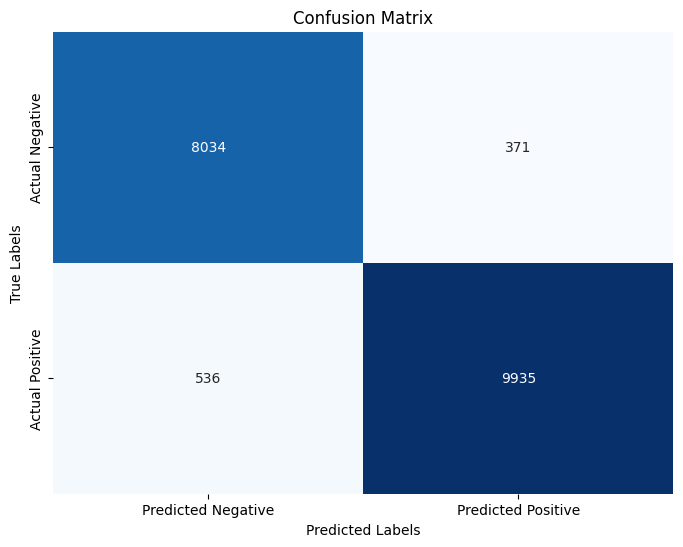

Elapsed time: 0:02:13.845616


In [89]:
rf_classifier = RandomForestClassifier(random_state = 42)

# Grid of parameters to choose from
param_grid = {
    'n_estimators': [
        # 100,
        # 150,
        # 200,
        # 300,
        500
    ],
    'max_depth': [
        None,
        # 10,
        # 20
    ],
    'min_samples_split': [
        2,
        # 5,
        # 20
    ],
    'min_samples_leaf': [
        1,
        # 10,
        # 15
    ],
    'bootstrap': [
        # True,
        False
    ],
    'class_weight': [
        # None,
        # 'balanced',
        'balanced_subsample'
    ],
    'criterion': [
        # 'gini',
        # 'entropy',
        'log_loss'
    ]
}

start_time = datetime.now()

# Setup the gridsearch with tuning using f1 due to imbalanced target classes
rf_grid = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid,
                              scoring = 'accuracy', cv = 5, n_jobs=-1, random_state=42,
                              n_iter=1)

# train using the raw data without removing the outliers bc tree algos work fine with them
rf_grid = rf_grid.fit(X_train, y_train)

# print the best params
print(f'Best Parameters: {rf_grid.best_params_}')
print(f'Best accuracy: {rf_grid.best_score_}')

# Set the tuned_classifier to the best combination of parameters
rf_best_classifier = rf_grid.best_estimator_

# Calculate Predictions
y_pred = rf_best_classifier.predict(X_validation)

# Model Performance on the validation data
rf_best_report = model_performance_classification(rf_best_classifier, X_validation, y_validation, y_pred, 'Random Forest')

# Make predictions
y_test_pred = rf_best_classifier.predict(X_test_processed_df)

end_time = datetime.now()
print(f'Elapsed time: {end_time - start_time}')

# Output predictions into a csv
output = pd.DataFrame({'ID': test_data['ID'], 'Overall_Experience': y_test_pred})
output.to_csv('random_forest_predictions.csv', index=False)

##**XGBoost Classifier**

In [ ]:
# XGBoost Classifier
xgb_classifier = XGBClassifier(objective='multi:softmax', use_label_encoder=False,
                               eval_metric='merror', random_state=42, num_class=len(np.unique(y_train)))

param_grid = {
    'n_estimators': [
        100,
        # 200,
        300,
        500
    ],
    'max_depth': [
        3,
        4,
        5,
        6,
        7,
        8
    ],
    'learning_rate': [
        0.01,
        0.05,
        0.1,
        0.15,
        0.2,
        0.25,
        0.3
    ],
    'subsample': [
        # 0.5,
        # 0.55,
        # 0.6,
        0.65,
        0.7,
        0.75,
        0.8,
        0.9,
        0.95,
        1.0
    ],
    'colsample_bytree': [
        # 0.5,
        # 0.55,
        # 0.6,
        0.65,
        0.7,
        0.75,
        0.8,
        0.9,
        0.95,
        1.0
    ],
    'min_child_weight': [
        1,
        2,
        3,
        # 4,
        # 5
    ]
}

start_time = datetime.now()

# Setup the gridsearch with tuning using f1 due to imbalanced target classes
# xgb_grid = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid,
#                               scoring='accuracy', cv=5, n_jobs=-1, random_state=42,
#                               n_iter=1)
xgb_grid = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid,
                        scoring='accuracy', cv=5, n_jobs=-1)

# train using the raw data without removing the outliers bc tree algos work fine with them
xgb_grid = xgb_grid.fit(X_train, y_train)

# print the best params
print(f'Best Parameters: {xgb_grid.best_params_}')
print(f'Best accuracy: {xgb_grid.best_score_}')

# Set the tuned_classifier to the best combination of parameters
xgb_best_classifier = xgb_grid.best_estimator_

# Calculate Predictions
y_pred = xgb_best_classifier.predict(X_validation)

# Model Performance on the validation data
xgb_best_report = model_performance_classification(xgb_best_classifier, X_validation, y_validation, y_pred, 'XGBoost')

# Make predictions on the test data
y_test_pred = xgb_best_classifier.predict(X_test_processed_df)

end_time = datetime.now()
print(f'Elapsed time: {end_time - start_time}')

# Output predictions into a csv
output = pd.DataFrame({'ID': test_data['ID'], 'Overall_Experience': y_test_pred})
output.to_csv('xgb_predictions.csv', index=False)

##**ANN Classifier**

In [ ]:
# Define the model creation function
def create_model(input_dimen, optimizer='adam', init='uniform', layers=1, first_layer_neurons=32, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(first_layer_neurons, input_dim=input_dimen, kernel_initializer=init, activation='relu'))
    for i in range(1, layers):
        model.add(Dense(first_layer_neurons // (2 ** i), kernel_initializer=init, activation='relu'))
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))

    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)

    # need to track accuracy and recall as metrics during training
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[Accuracy()])
    return model

Best Parameters: {'model__optimizer': 'sgd', 'model__learning_rate': 0.1, 'model__layers': 2, 'model__input_dimen': 78, 'model__init': 'uniform', 'model__first_layer_neurons': 16, 'epochs': 150}
Best accuracy: 0.9476180069650226
ANN Accuracy: 0.9495655859292222
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8405
           1       0.98      0.93      0.95     10471

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



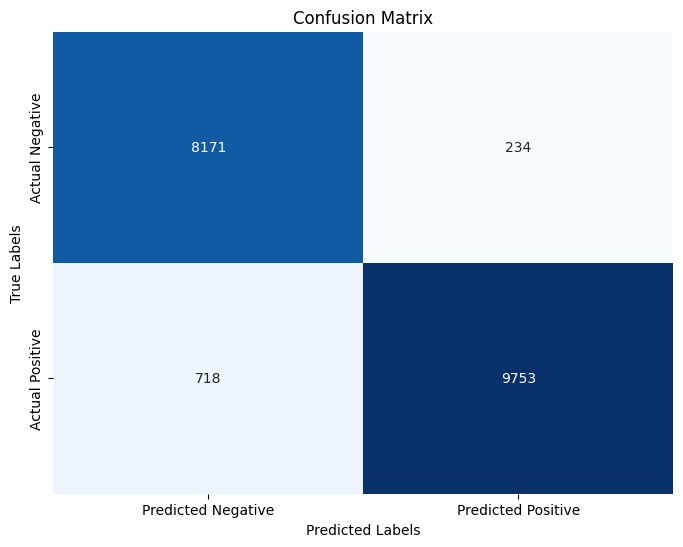

Elapsed time: 7:07:04.415669


In [ ]:
# Wrap the model using KerasClassifier
ann_classifier = KerasClassifier(build_fn=create_model, verbose=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'model__optimizer': [
        'adam',
        'rmsprop',
        'sgd'
    ],
    'model__init': [
        'uniform',
        'normal',
        'glorot_uniform'
    ],
    'model__layers': [
        1,
        2,
        3
    ],
    'model__first_layer_neurons': [
        16,
        32,
        64,
        128
    ],
    'model__input_dimen': [
        X_train.shape[1]
    ],
    'model__learning_rate': [
        0.001,
        0.01,
        0.1
    ],
    'epochs': [
        100,
        150
    ]
}

start_time = datetime.now()

# Setup the gridsearch with tuning using f1 due to imbalanced target classes
ann_grid = RandomizedSearchCV(estimator=ann_classifier, param_distributions=param_grid,
                              scoring='accuracy', cv=5, n_jobs=-1, random_state=42,
                              n_iter=60)

# train using the raw data without removing the outliers bc tree algos work fine with them
ann_grid = ann_grid.fit(X_train, y_train)

# print the best params
print(f'Best Parameters: {ann_grid.best_params_}')
print(f'Best accuracy: {ann_grid.best_score_}')

# Set the tuned_classifier to the best combination of parameters
ann_best_classifier = ann_grid.best_estimator_

# Calculate Predictions
y_pred = ann_best_classifier.predict(X_validation)

# Model Performance on the validation data
ann_best_report = model_performance_classification(ann_best_classifier, X_validation, y_validation, y_pred, 'ANN')

# Make predictions on the test data
y_test_pred = ann_best_classifier.predict(X_test_processed_df)

end_time = datetime.now()
print(f'Elapsed time: {end_time - start_time}')

# Output predictions into a csv
output = pd.DataFrame({'ID': test_data['ID'], 'Overall_Experience': y_test_pred})
output.to_csv('ann_predictions.csv', index=False)

#**Model Comparison and Summary**

In [ ]:
summary = pd.concat([rf_best_report, xgb_best_report, ann_best_report],axis=0, ignore_index=True)
summary

,name,precision,recall,f1-score,accuracy
0,Random Forest,0.96320,0.94977,0.95643,0.95200
1,XGBoost,0.96527,0.95559,0.96041,0.95629
2,ANN,0.97657,0.93143,0.95347,0.94957
